0
10
1
1
9
1
2
8
3
7
4
6
5
5
5


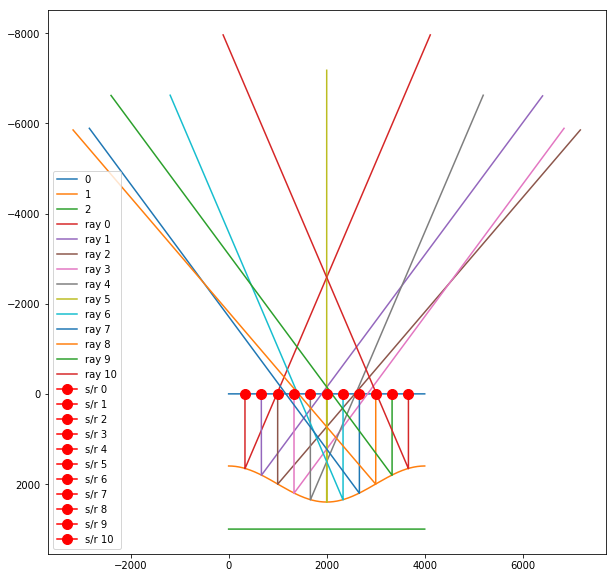

In [104]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt


L=11   #no of sources
M=L           #no of rays
N=4000     #no of iterations
dt=0.002   #time increment of 1s
v0=1500     #velocity shallow
v1=3000          #velocity deep
X=4000    # increment in x

ray=np.zeros((M,2,N))
rayp=np.ones(M)
raya=np.zeros(M)
src=np.zeros((L,2,1))

def layer0(x):
    return 0

def layer1(x):
    return 2000-400*mt.cos(2*mt.pi*x/X)

def layer1ang(x):
    return mt.atan(500*2*mt.pi*(1/X)*mt.sin(2*mt.pi*x/X))

def layer2(x):
    return 3000

def raytracedown(t,i):
    ray[i,1,t+1]=ray[i,1,t]+v0*dt*mt.cos(raya[i])
    ray[i,0,t+1]=ray[i,0,t]+v0*dt*mt.sin(raya[i])

    
def raytraceup(t,i):
    ray[i,1,t+1]=ray[i,1,t]-v0*dt*mt.cos(raya[i])
    ray[i,0,t+1]=ray[i,0,t]-v0*dt*mt.sin(raya[i])
    
    
for i in range(L):             #initialise rays
    src[i,0]=(i+1)*X/(L+1)
    src[i,1]=0
    ray[i,0,0]=src[i,0]
    ray[i,1,0]=src[i,1]
    raya[i]=0

for t in range(N-1):
    for i in range(M):
        if rayp[i]==1:
            raytracedown(t,i)
        if rayp[i]==-1:
            raytraceup(t,i)
        if ray[i,1,t]>=layer1(ray[i,0,t]) and ray[i,1,t-1]<=layer1(ray[i,0,t]):
            print(i)
            rayp[i]=-rayp[i]
            raya[i]=-(raya[i]+layer1ang(ray[i,0,t]))
    

                  
        
        
event0=np.zeros(X)                  #plotting
event1=np.zeros(X)
event2=np.zeros(X)        
        
for i in range(X):                              
    event1[i] = layer1(i)
    event2[i] = layer2(i)
        
plt.plot(event0, label="0")
plt.plot(event1, label="1")
plt.plot(event2, label="2")
for i in range(M):
    plt.plot(ray[i,0],ray[i,1], label="ray %i" % i)
for i in range(L):
    plt.plot(src[i,0], src[i,1], marker='o', markersize=10, color="red",label="s/r %i" % i)
plt.gca().invert_yaxis()
plt.legend()
plt.rcParams["figure.figsize"]=10,10
plt.show()        